In [274]:
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [275]:
with ZipFile('titanic.zip', 'r') as zipf:
    df = pd.read_csv(zipf.open('train.csv'))
    test_data = pd.read_csv(zipf.open('test.csv'))


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(['Name', 'Ticket', 'Cabin', ], axis=1)

In [5]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


## Проверка Embarked на кореляцию

In [6]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
emb = df[['Embarked', 'Survived']]

In [17]:
arr = []
for i in emb['Embarked']:
    if i == 'C':
        arr.append(0)
    elif i == 'Q':
        arr.append(1)
    else: arr.append(2)

In [21]:
emb = emb.drop('Embarked', axis=1)
emb['Embarked'] = arr
emb.head()

,Survived,Embarked
0,0,2
1,1,0
2,1,2
3,1,2
4,0,2


In [41]:
emb['Embarked'].value_counts().sort_index()

0    168
1     77
2    646
Name: Embarked, dtype: int64

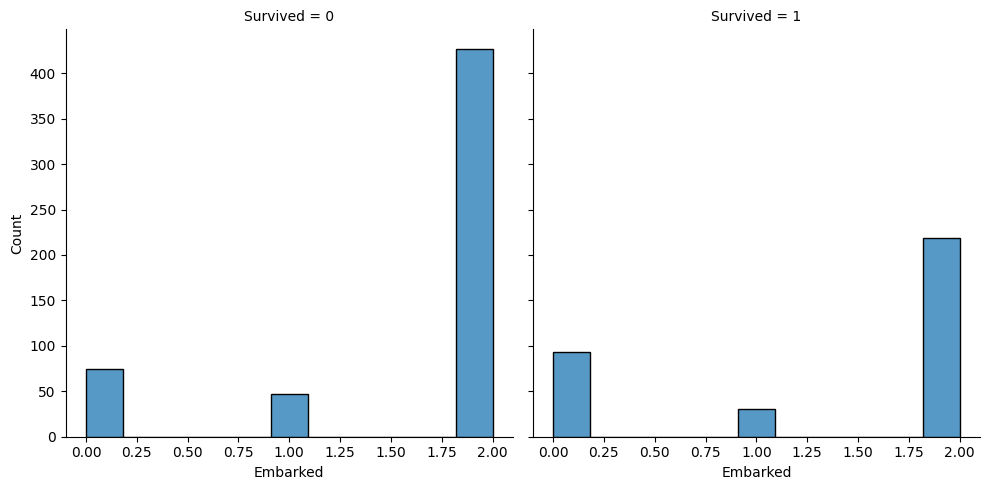

In [28]:
d = sns.displot(emb, x="Embarked", col='Survived')

<font size=5>Делаем вывод, что от места посадки мало зависит выживаемость пасажира.

## Проверка данных на корреляцию

In [45]:
df = df.drop('Embarked', axis=1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN
887,888,1,1,female,19.0,0,0,30.0000,B42
888,889,0,3,female,NaN,1,2,23.4500,NaN
889,890,1,1,male,26.0,0,0,30.0000,C148


In [46]:
df = df.drop('Cabin', axis=1)

In [48]:
df = pd.get_dummies(df)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [74]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000


<Axes: >

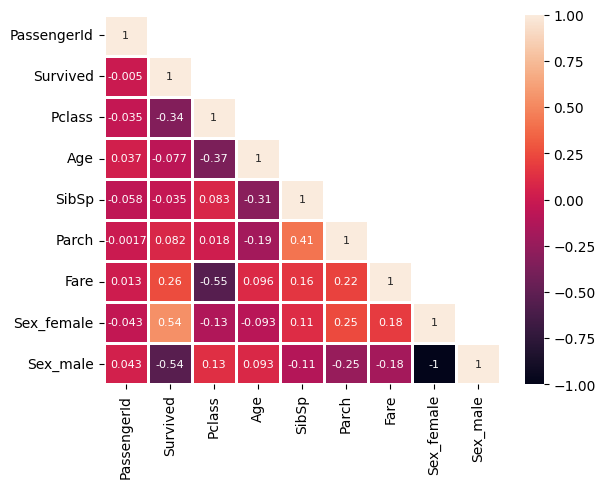

In [79]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)
sns.heatmap(df.corr(), annot=True, linewidth=1, annot_kws={"fontsize":8}, mask=mask)

In [75]:
corr.Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Sex_female     0.543351
Sex_male      -0.543351
Name: Survived, dtype: float64

<font size=5>Видно что такие данные как SibSp почти не коррелируют с выживаемостью, избавимся от них.

In [81]:
df = df.drop('SibSp', axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,0,7.2500,0,1
1,2,1,1,38.0,0,71.2833,1,0
2,3,1,3,26.0,0,7.9250,1,0
3,4,1,1,35.0,0,53.1000,1,0
4,5,0,3,35.0,0,8.0500,0,1


## Проверим на пропущенные данные и если есть исправим это

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    uint8  
 7   Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 43.6 KB


In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
Parch            0
Fare             0
Sex_female       0
Sex_male         0
dtype: int64

<font size=5>Видим что в колонке Age 177 пропущенных значений, можно либо удалить строки содержащие эти пропуски, но уменьшить количество данных, либо вставить в пропуски другие данные например медианное значение возраста.

In [93]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [94]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
dtype: int64

## Разделим на X и y наши данные

In [95]:
X, y = df.drop(['PassengerId', 'Survived'], axis=1), df.Survived

In [96]:
X, y

     Pclass        Age  Parch     Fare  Sex_female  Sex_male
0         3  22.000000      0   7.2500           0         1
1         1  38.000000      0  71.2833           1         0
2         3  26.000000      0   7.9250           1         0
3         1  35.000000      0  53.1000           1         0
4         3  35.000000      0   8.0500           0         1
..      ...        ...    ...      ...         ...       ...
886       2  27.000000      0  13.0000           0         1
887       1  19.000000      0  30.0000           1         0
888       3  29.699118      2  23.4500           1         0
889       1  26.000000      0  30.0000           0         1
890       3  32.000000      0   7.7500           0         1

[891 rows x 6 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<font size=5> Разделим данные на тестовые и тренировочные 

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

In [106]:
print('X_train size: ', len(X_train), '\nX_test size: ', len(X_test))

X_train size:  623 
X_test size:  268


## Классифицируем с помощью линейных моделей

### LogisticRegression

In [108]:
clf = LogisticRegression()

In [109]:
clf.fit(X_train, y_train)

LogisticRegression()

In [110]:
predictions = clf.predict(X_test)

In [121]:
print('accuracy score: %.3f' % accuracy_score(y_test, predictions))

accuracy score: 0.784


In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       173
           1       0.67      0.76      0.71        95

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.79       268



<font size=5> Подбор оптимальных параметров для модели

In [287]:
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty': ['l2'],
            'max_iter': [10000, 1000, 100]}

In [288]:
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True)

In [293]:
%%capture
grid.fit(X_train, y_train)

In [139]:
grid.best_params_

{'C': 1.0, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [140]:
clf_best = LogisticRegression(C=1, max_iter=10000, penalty='l2')
clf_best.fit(X_train, y_train)
predictions_best = clf_best.predict(X_test)

In [141]:
print(classification_report(y_test, predictions_best))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



<font size=6> Лучшая точность у этой модели : 81%

### SGDClassifier

In [148]:
clf = SGDClassifier()

In [149]:
clf.fit(X_train, y_train)

SGDClassifier()

In [150]:
predictions = clf.predict(X_test)

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.48      0.62       165
           1       0.52      0.90      0.66       103

    accuracy                           0.64       268
   macro avg       0.70      0.69      0.64       268
weighted avg       0.75      0.64      0.64       268



<font size=5> Подбор оптимальных параметров для модели

In [211]:
param_grid = {'loss': ['hinge', 
                       'log_loss', 
                       'modified_huber', 
                       'squared_hinge', 
                       'perceptron', 
                       'squared_error', 
                       'huber',
                       'epsilon_insensitive', 
                       'squared_epsilon_insensitive'],
              'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'max_iter': [10000, 1000, 100]}

In [212]:
grid = GridSearchCV(SGDClassifier(), param_grid, refit=True)

In [294]:
%%capture
grid.fit(X_train, y_train)

In [214]:
grid.best_params_

{'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 10000}

In [246]:
clf = SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=1000)

In [258]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



<font size=6> Лучшая точность у этой модели также : 81%

#### Perceptron

In [242]:
clf = Perceptron()

In [243]:
clf.fit(X_train, y_train)

Perceptron()

In [244]:
prediction = clf.predict(X_test)

In [245]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.68      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [260]:
param_grid = {'penalty': ['l2'],
              'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'max_iter': [10000, 1000, 100]}

In [261]:
grid = GridSearchCV(Perceptron(), param_grid, refit=True)

In [295]:
%%capture
grid.fit(X_train, y_train)

In [263]:
grid.best_params_

{'alpha': 0.0001, 'max_iter': 10000, 'penalty': 'l2'}

In [264]:
clf = Perceptron(alpha=0.0001, max_iter=10000, penalty='l2')

In [267]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



<font size=5>Лучшая точность у этой модели также : 81%